In [79]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\RER\Code\22.csv')
df

,Sending_Country,Receiving_Country,Year,Value,Unit,Source,Region,Sending_Country_Code,Receiving_Country_Code,Sending_Country_GDP,Receiving_Country_GDP
0,Algeria,Senegal,2021,0.183414825,USD millions,BCEAO,Africa,DZA,SEN,1.994889e+05,2.435960e+04
1,Australia,Ethiopia,2020,13.59617511,USD millions,National Bank of Ethiopia,Africa,AUS,ETH,1.491063e+06,9.507178e+04
2,Australia,Kenya,2024,"184,497.099695719",USD millions,Central Bank of Kenya,Africa,AUS,KEN,1.665258e+06,1.045752e+05
3,Australia,Uganda,2022,22,USD millions,Bank of Uganda,Africa,AUS,UGA,1.587133e+06,4.414722e+04
4,Austria,Kenya,2024,"13,169.065145833",USD millions,Central Bank of Kenya,Africa,AUT,KEN,4.181904e+05,1.045752e+05
...,...,...,...,...,...,...,...,...,...,...,...
3975,Suriname,United States,2019,5.022,USD millions,Roland Kpodar (IMF),North America,SUR,USA,5.256434e+03,2.015964e+07
3976,Suriname,United States,2020,3.275,USD millions,Roland Kpodar (IMF),North America,SUR,USA,4.416708e+03,1.972358e+07
3977,Suriname,Vietnam,2018,1.401,USD millions,Roland Kpodar (IMF),Asia,SUR,VNM,5.195769e+03,2.933586e+05
3978,Suriname,Vietnam,2019,1.453,USD millions,Roland Kpodar (IMF),Asia,SUR,VNM,5.256434e+03,3.149476e+05


In [80]:
# Examine the data structure
print("Data shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Data shape: (3980, 11)

Column names:
['Sending_Country', 'Receiving_Country', 'Year', 'Value', 'Unit', 'Source', 'Region', 'Sending_Country_Code', 'Receiving_Country_Code', 'Sending_Country_GDP', 'Receiving_Country_GDP']

First few rows:


,Sending_Country,Receiving_Country,Year,Value,Unit,Source,Region,Sending_Country_Code,Receiving_Country_Code,Sending_Country_GDP,Receiving_Country_GDP
0,Algeria,Senegal,2021,0.183414825,USD millions,BCEAO,Africa,DZA,SEN,1.994889e+05,24359.596784
1,Australia,Ethiopia,2020,13.59617511,USD millions,National Bank of Ethiopia,Africa,AUS,ETH,1.491063e+06,95071.775812
2,Australia,Kenya,2024,"184,497.099695719",USD millions,Central Bank of Kenya,Africa,AUS,KEN,1.665258e+06,104575.203136
3,Australia,Uganda,2022,22,USD millions,Bank of Uganda,Africa,AUS,UGA,1.587133e+06,44147.216890
4,Austria,Kenya,2024,"13,169.065145833",USD millions,Central Bank of Kenya,Africa,AUT,KEN,4.181904e+05,104575.203136


In [81]:
# Check data types and unique years
print("Data types:")
print(df.dtypes)
print("\nUnique years:", sorted(df['Year'].unique()))
print("\nSample values from Value column:")
print(df['Value'].head(10))
print("\nValue column type:", type(df['Value'].iloc[0]))

Data types:
Sending_Country            object
Receiving_Country          object
Year                        int64
Value                      object
Unit                       object
Source                     object
Region                     object
Sending_Country_Code       object
Receiving_Country_Code     object
Sending_Country_GDP       float64
Receiving_Country_GDP     float64
dtype: object

Unique years: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]

Sample values from Value column:
0          0.183414825
1          13.59617511
2    184,497.099695719
3                   22
4     13,169.065145833
5      1,453.632639905
6      5,004.769090469
7           30.3408085
8     22,844.654997935
9           387.629403
Name: Value, dtype: object

Value column type: <class 'str'>


In [82]:
# Clean the Value column by removing commas and converting to numeric
df['Value_numeric'] = pd.to_numeric(df['Value'].astype(str).str.replace(',', ''), errors='coerce')

# Check for any conversion issues
print("Number of rows with conversion issues:", df['Value_numeric'].isna().sum())
print("Sample of cleaned values:")
print(df[['Value', 'Value_numeric']].head(10))

Number of rows with conversion issues: 0
Sample of cleaned values:
               Value  Value_numeric
0        0.183414825       0.183415
1        13.59617511      13.596175
2  184,497.099695719  184497.099696
3                 22      22.000000
4   13,169.065145833   13169.065146
5    1,453.632639905    1453.632640
6    5,004.769090469    5004.769090
7         30.3408085      30.340809
8   22,844.654997935   22844.654998
9         387.629403     387.629403


In [83]:
# Calculate average yearly remittances by receiving country
avg_remittances = df.groupby('Receiving_Country')['Value_numeric'].mean().reset_index()
avg_remittances.columns = ['Receiving_Country', 'Average_Yearly_Remittances_USD_Millions']

# Sort by average remittances in descending order to get the ranking
top_receiving_countries = avg_remittances.sort_values('Average_Yearly_Remittances_USD_Millions', 
                                                     ascending=False).reset_index(drop=True)

# Add ranking column
top_receiving_countries['Rank'] = range(1, len(top_receiving_countries) + 1)

# Reorder columns
top_receiving_countries = top_receiving_countries[['Rank', 'Receiving_Country', 'Average_Yearly_Remittances_USD_Millions']]

print("Top 20 Countries Receiving Remittances (Average Yearly, USD Millions):")
print("=" * 70)
top_20 = top_receiving_countries.head(20)
for _, row in top_20.iterrows():
    print(f"{row['Rank']:2d}. {row['Receiving_Country']:<25} ${row['Average_Yearly_Remittances_USD_Millions']:,.2f}")

print(f"\nTotal countries in dataset: {len(top_receiving_countries)}")

Top 20 Countries Receiving Remittances (Average Yearly, USD Millions):
 1. Kenya                     $49,104.92
 2. Pakistan                  $750.66
 3. Dominican Republic        $583.51
 4. Honduras                  $578.35
 5. Costa Rica                $497.87
 6. Armenia                   $326.54
 7. Mexico                    $325.00
 8. Kyrgyz Republic           $309.58
 9. Morocco                   $294.92
10. Russian Federation        $263.78
11. Colombia                  $217.24
12. Nicaragua                 $215.25
13. Haiti                     $190.42
14. Brazil                    $153.26
15. Philippines               $141.71
16. Jamaica                   $138.62
17. Bolivia                   $103.43
18. Senegal                   $98.07
19. Portugal                  $76.69
20. Ethiopia                  $62.95

Total countries in dataset: 214


In [84]:
# Display the full ranking as a DataFrame for better readability
print("\nComplete Ranking of Top Receiving Countries:")
print(top_receiving_countries)

# Let's also add some additional statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS:")
print("="*60)
print(f"Total number of receiving countries: {len(top_receiving_countries)}")
print(f"Average remittances across all countries: ${top_receiving_countries['Average_Yearly_Remittances_USD_Millions'].mean():,.2f} million")
print(f"Median remittances: ${top_receiving_countries['Average_Yearly_Remittances_USD_Millions'].median():,.2f} million")
print(f"Top country (Kenya) receives: ${top_receiving_countries.iloc[0]['Average_Yearly_Remittances_USD_Millions']:,.2f} million USD on average")
print(f"This is {top_receiving_countries.iloc[0]['Average_Yearly_Remittances_USD_Millions'] / top_receiving_countries.iloc[1]['Average_Yearly_Remittances_USD_Millions']:.1f}x more than the second-highest country")


Complete Ranking of Top Receiving Countries:
     Rank      Receiving_Country  Average_Yearly_Remittances_USD_Millions
0       1                  Kenya                             49104.916143
1       2               Pakistan                               750.658945
2       3     Dominican Republic                               583.507195
3       4               Honduras                               578.353774
4       5             Costa Rica                               497.865132
..    ...                    ...                                      ...
209   210  Micronesia. Fed. Sts.                                 0.000000
210   211    St. Kitts and Nevis                                 0.000000
211   212  Sao Tome and Principe                                 0.000000
212   213            Puerto Rico                                 0.000000
213   214            Timor-Leste                                 0.000000

[214 rows x 3 columns]

SUMMARY STATISTICS:
Total number of recei

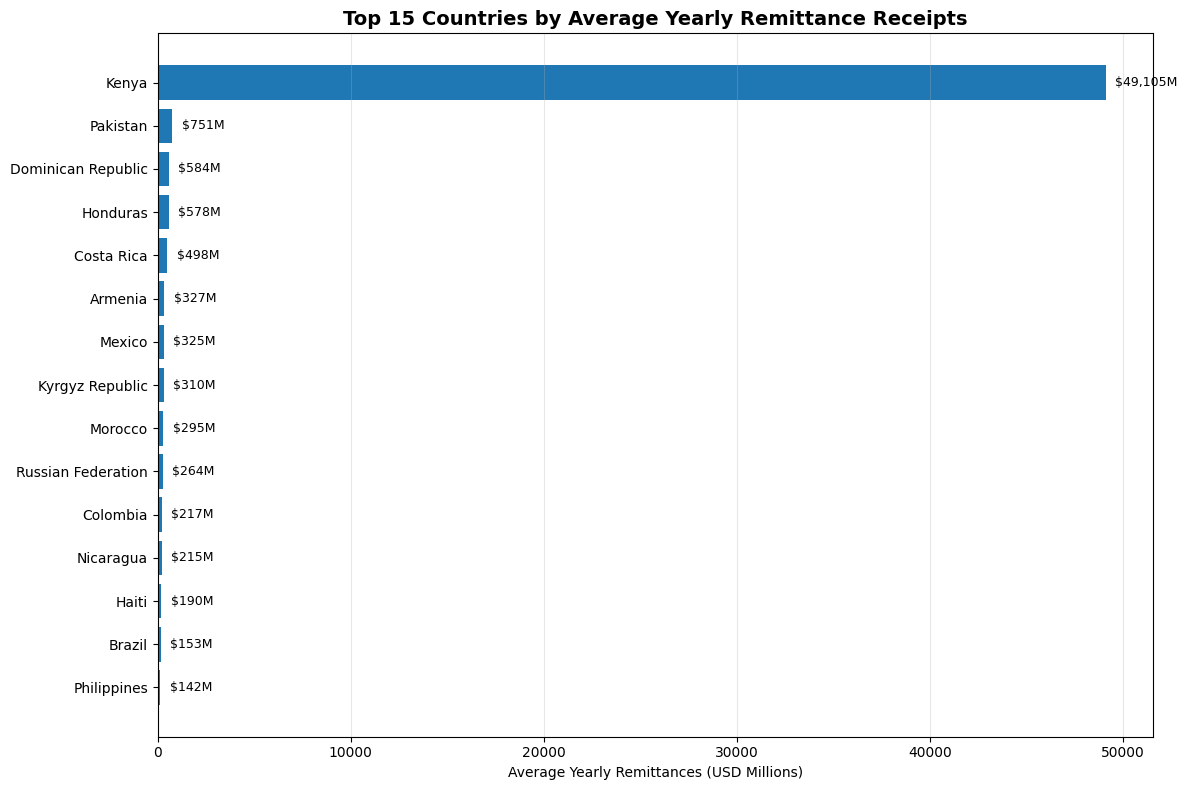

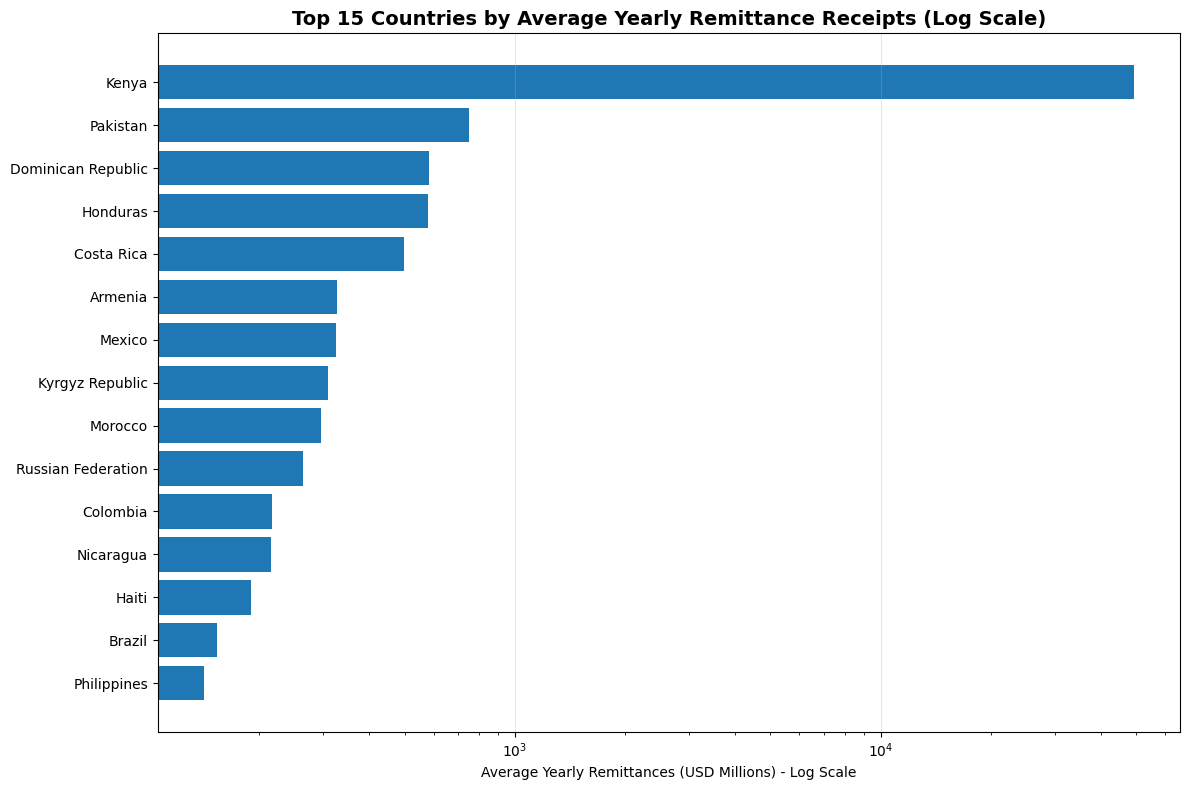

In [85]:
# Create a visualization of the top 15 receiving countries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
top_15 = top_receiving_countries.head(15)

# Create horizontal bar chart for better readability of country names
bars = plt.barh(range(len(top_15)), top_15['Average_Yearly_Remittances_USD_Millions'])
plt.yticks(range(len(top_15)), top_15['Receiving_Country'])
plt.xlabel('Average Yearly Remittances (USD Millions)')
plt.title('Top 15 Countries by Average Yearly Remittance Receipts', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, v in enumerate(top_15['Average_Yearly_Remittances_USD_Millions']):
    plt.text(v + max(top_15['Average_Yearly_Remittances_USD_Millions']) * 0.01, i, f'${v:,.0f}M', 
             va='center', fontsize=9)

plt.gca().invert_yaxis()  # Invert y-axis to show rank 1 at top
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

# Also create a log scale version to better see the differences between lower-ranked countries
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_15)), top_15['Average_Yearly_Remittances_USD_Millions'])
plt.yticks(range(len(top_15)), top_15['Receiving_Country'])
plt.xlabel('Average Yearly Remittances (USD Millions) - Log Scale')
plt.title('Top 15 Countries by Average Yearly Remittance Receipts (Log Scale)', fontsize=14, fontweight='bold')
plt.xscale('log')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

In [86]:
# CORRECTED ANALYSIS: 
# Step 1: For each country and year, sum all remittances received from all sending countries
# Step 2: Then average those yearly totals across all years for each country

print("CORRECTED ANALYSIS:")
print("=" * 50)

# First, let's see the data structure again
print("Sample data to understand the approach:")
sample_country = df[df['Receiving_Country'] == 'Kenya'].head(10)[['Sending_Country', 'Receiving_Country', 'Year', 'Value_numeric']]
print(sample_country)

# Step 1: Sum remittances by receiving country and year
yearly_totals = df.groupby(['Receiving_Country', 'Year'])['Value_numeric'].sum().reset_index()
yearly_totals.columns = ['Receiving_Country', 'Year', 'Total_Remittances_USD_Millions']

print(f"\nYearly totals data shape: {yearly_totals.shape}")
print("\nSample of yearly totals:")
sample_yearly = yearly_totals[yearly_totals['Receiving_Country'] == 'Kenya']
print(sample_yearly)

CORRECTED ANALYSIS:
Sample data to understand the approach:
   Sending_Country Receiving_Country  Year  Value_numeric
2        Australia             Kenya  2024  184497.099696
4          Austria             Kenya  2024   13169.065146
5          Bahamas             Kenya  2024    1453.632640
6          Bahrain             Kenya  2024    5004.769090
8          Belgium             Kenya  2024   22844.654998
16          Canada             Kenya  2024  130812.769728
22           China             Kenya  2024    5981.681938
27   Côte d'Ivoire             Kenya  2024    4351.233360
32           Egypt             Kenya  2024    2710.849917
34          France             Kenya  2024   25420.562301

Yearly totals data shape: (659, 3)

Sample of yearly totals:
    Receiving_Country  Year  Total_Remittances_USD_Millions
312             Kenya  2018                    6.525700e-02
313             Kenya  2019                    3.644600e-02
314             Kenya  2020                    2.229583e+01


In [87]:
# Step 2: Calculate average of yearly totals for each country
corrected_avg_remittances = yearly_totals.groupby('Receiving_Country')['Total_Remittances_USD_Millions'].mean().reset_index()
corrected_avg_remittances.columns = ['Receiving_Country', 'Average_Yearly_Total_Remittances_USD_Millions']

# Sort by average remittances in descending order
corrected_ranking = corrected_avg_remittances.sort_values('Average_Yearly_Total_Remittances_USD_Millions', 
                                                         ascending=False).reset_index(drop=True)

# Add ranking column
corrected_ranking['Rank'] = range(1, len(corrected_ranking) + 1)

# Reorder columns
corrected_ranking = corrected_ranking[['Rank', 'Receiving_Country', 'Average_Yearly_Total_Remittances_USD_Millions']]

print("\nCORRECTED RANKING - Top 20 Countries Receiving Remittances:")
print("(Average of yearly totals across all years, USD Millions)")
print("=" * 80)
corrected_top_20 = corrected_ranking.head(20)
for _, row in corrected_top_20.iterrows():
    print(f"{row['Rank']:2d}. {row['Receiving_Country']:<25} ${row['Average_Yearly_Total_Remittances_USD_Millions']:,.2f}")

print(f"\nTotal countries in dataset: {len(corrected_ranking)}")

# Show how many years of data each top country has
print("\nData coverage for top 10 countries:")
for country in corrected_top_20.head(10)['Receiving_Country']:
    years = yearly_totals[yearly_totals['Receiving_Country'] == country]['Year'].tolist()
    print(f"{country:<25}: {len(years)} years ({years})")


CORRECTED RANKING - Top 20 Countries Receiving Remittances:
(Average of yearly totals across all years, USD Millions)
 1. Kenya                     $491,049.16
 2. Philippines               $28,058.78
 3. Pakistan                  $19,517.13
 4. Mexico                    $14,462.48
 5. Dominican Republic        $7,585.59
 6. Haiti                     $3,110.17
 7. Brazil                    $2,988.58
 8. Kyrgyz Republic           $2,476.61
 9. Morocco                   $2,457.69
10. Costa Rica                $2,364.86
11. Jamaica                   $2,252.63
12. Colombia                  $2,226.71
13. Honduras                  $2,168.83
14. Ecuador                   $1,950.98
15. Nicaragua                 $1,829.65
16. Georgia                   $1,547.39
17. Armenia                   $1,306.16
18. Senegal                   $1,152.38
19. Russian Federation        $1,055.11
20. United States             $866.59

Total countries in dataset: 214

Data coverage for top 10 countries:
Kenya   

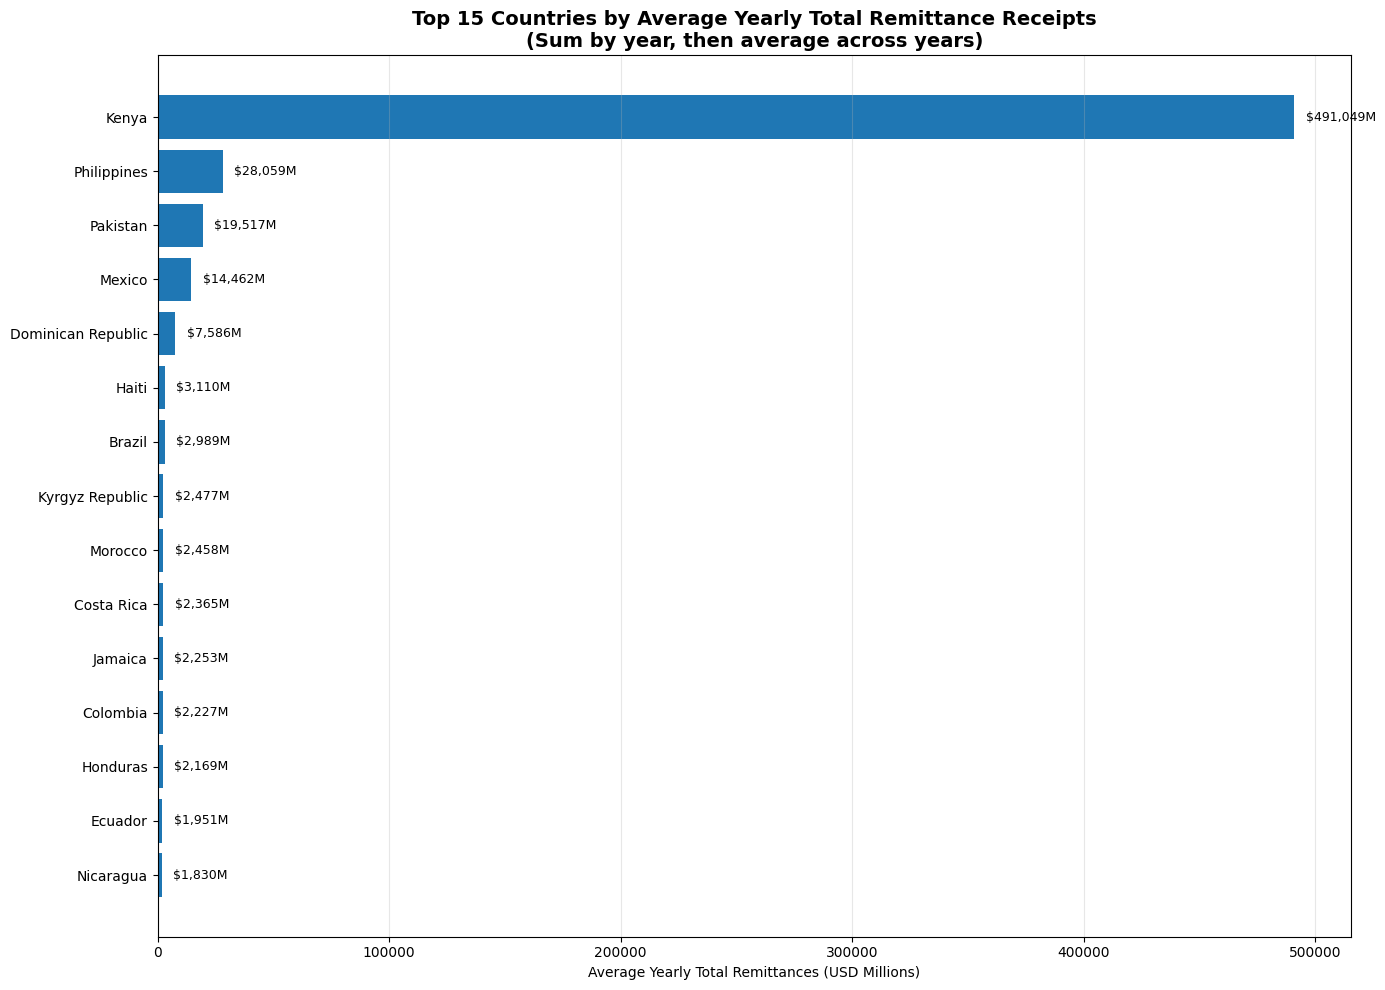


COMPARISON: Original vs Corrected Method
ORIGINAL METHOD: Average of individual transactions
CORRECTED METHOD: Average of yearly country totals

Country              Original Rank   Corrected Rank  Original Value       Corrected Value
------------------------------------------------------------------------------------------
Kenya                1               1               $         49,105M $        491,049M
Pakistan             2               3               $            751M $         19,517M
Dominican Republic   3               5               $            584M $          7,586M
Costa Rica           5               10              $            498M $          2,365M
Mexico               7               4               $            325M $         14,462M
Kyrgyz Republic      8               8               $            310M $          2,477M
Morocco              9               9               $            295M $          2,458M


In [88]:
# Create visualization for the corrected ranking
plt.figure(figsize=(14, 10))
corrected_top_15 = corrected_ranking.head(15)

# Create horizontal bar chart
bars = plt.barh(range(len(corrected_top_15)), corrected_top_15['Average_Yearly_Total_Remittances_USD_Millions'])
plt.yticks(range(len(corrected_top_15)), corrected_top_15['Receiving_Country'])
plt.xlabel('Average Yearly Total Remittances (USD Millions)')
plt.title('Top 15 Countries by Average Yearly Total Remittance Receipts\n(Sum by year, then average across years)', 
          fontsize=14, fontweight='bold')

# Add value labels on bars
for i, v in enumerate(corrected_top_15['Average_Yearly_Total_Remittances_USD_Millions']):
    plt.text(v + max(corrected_top_15['Average_Yearly_Total_Remittances_USD_Millions']) * 0.01, i, 
             f'${v:,.0f}M', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

# Show comparison with the original method
print("\n" + "="*80)
print("COMPARISON: Original vs Corrected Method")
print("="*80)
print("ORIGINAL METHOD: Average of individual transactions")
print("CORRECTED METHOD: Average of yearly country totals")
print()
comparison_df = pd.merge(
    top_receiving_countries.head(10)[['Rank', 'Receiving_Country', 'Average_Yearly_Remittances_USD_Millions']], 
    corrected_ranking.head(10)[['Rank', 'Receiving_Country', 'Average_Yearly_Total_Remittances_USD_Millions']], 
    on='Receiving_Country', 
    suffixes=('_Original', '_Corrected')
)

print(f"{'Country':<20} {'Original Rank':<15} {'Corrected Rank':<15} {'Original Value':<20} {'Corrected Value'}")
print("-" * 90)
for _, row in comparison_df.iterrows():
    print(f"{row['Receiving_Country']:<20} {row['Rank_Original']:<15} {row['Rank_Corrected']:<15} ${row['Average_Yearly_Remittances_USD_Millions']:>15,.0f}M ${row['Average_Yearly_Total_Remittances_USD_Millions']:>15,.0f}M")

In [89]:
# EXAMPLE: How the corrected calculation works
print("="*60)
print("EXAMPLE OF HOW THE CORRECTED CALCULATION WORKS")
print("="*60)

# Let's create a simple example using your numbers
print("Suppose a country has:")
print("- Year 2020: $1 million in total remittances")
print("- Year 2021: $3 million in total remittances") 
print("- Year 2022: $2 million in total remittances")
print()

# Example calculation
year_2020 = 1
year_2021 = 3
year_2022 = 2

print("Step-by-step calculation:")
print(f"Year 2020: ${year_2020} million")
print(f"Year 2021: ${year_2021} million") 
print(f"Year 2022: ${year_2022} million")
print()

# Calculate the average
total_years = 3
sum_of_years = year_2020 + year_2021 + year_2022
average = sum_of_years / total_years

print(f"Sum of all years: ${year_2020} + ${year_2021} + ${year_2022} = ${sum_of_years} million")
print(f"Number of years: {total_years}")
print(f"Average yearly remittances: ${sum_of_years} ÷ {total_years} = ${average:.2f} million")
print()

print("So this country would be ranked based on $2.00 million average yearly remittances")
print()
print("="*60)

# Now let's show how this works with actual data from our dataset
print("REAL EXAMPLE FROM OUR DATASET:")
print("="*60)

# Pick a country with clear data - let's use Dominican Republic
example_country = "Dominican Republic"
country_data = yearly_totals[yearly_totals['Receiving_Country'] == example_country].sort_values('Year')

if len(country_data) > 0:
    print(f"Country: {example_country}")
    print("Yearly totals from our dataset:")
    
    yearly_values = []
    for _, row in country_data.iterrows():
        year = int(row['Year'])
        value = row['Total_Remittances_USD_Millions']
        yearly_values.append(value)
        print(f"  Year {year}: ${value:,.2f} million")
    
    calculated_average = sum(yearly_values) / len(yearly_values)
    
    print(f"\nCalculation:")
    print(f"Sum: ${sum(yearly_values):,.2f} million")
    print(f"Number of years: {len(yearly_values)}")
    print(f"Average: ${sum(yearly_values):,.2f} ÷ {len(yearly_values)} = ${calculated_average:,.2f} million")
    
    # Verify this matches our corrected_ranking
    ranking_value = corrected_ranking[corrected_ranking['Receiving_Country'] == example_country]['Average_Yearly_Total_Remittances_USD_Millions'].iloc[0]
    ranking_position = corrected_ranking[corrected_ranking['Receiving_Country'] == example_country]['Rank'].iloc[0]
    
    print(f"\nThis matches our ranking: ${ranking_value:,.2f} million (Rank #{ranking_position})")
else:
    print("No data found for this example country")

EXAMPLE OF HOW THE CORRECTED CALCULATION WORKS
Suppose a country has:
- Year 2020: $1 million in total remittances
- Year 2021: $3 million in total remittances
- Year 2022: $2 million in total remittances

Step-by-step calculation:
Year 2020: $1 million
Year 2021: $3 million
Year 2022: $2 million

Sum of all years: $1 + $3 + $2 = $6 million
Number of years: 3
Average yearly remittances: $6 ÷ 3 = $2.00 million

So this country would be ranked based on $2.00 million average yearly remittances

REAL EXAMPLE FROM OUR DATASET:
Country: Dominican Republic
Yearly totals from our dataset:
  Year 2018: $6,240.07 million
  Year 2019: $6,691.06 million
  Year 2020: $7,951.81 million
  Year 2022: $9,459.43 million

Calculation:
Sum: $30,342.37 million
Number of years: 4
Average: $30,342.37 ÷ 4 = $7,585.59 million

This matches our ranking: $7,585.59 million (Rank #5)


In [90]:
# MEDIAN ANALYSIS: Same approach but using median instead of mean
print("="*80)
print("MEDIAN ANALYSIS - Top Countries by MEDIAN Yearly Remittance Receipts")
print("="*80)

# Step 1: Calculate median of yearly totals for each country (instead of mean)
median_remittances = yearly_totals.groupby('Receiving_Country')['Total_Remittances_USD_Millions'].median().reset_index()
median_remittances.columns = ['Receiving_Country', 'Median_Yearly_Total_Remittances_USD_Millions']

# Sort by median remittances in descending order
median_ranking = median_remittances.sort_values('Median_Yearly_Total_Remittances_USD_Millions', 
                                               ascending=False).reset_index(drop=True)

# Add ranking column
median_ranking['Rank'] = range(1, len(median_ranking) + 1)

# Reorder columns
median_ranking = median_ranking[['Rank', 'Receiving_Country', 'Median_Yearly_Total_Remittances_USD_Millions']]

print("Top 20 Countries Receiving Remittances (MEDIAN of yearly totals, USD Millions):")
print("=" * 85)
median_top_20 = median_ranking.head(20)
for _, row in median_top_20.iterrows():
    print(f"{row['Rank']:2d}. {row['Receiving_Country']:<25} ${row['Median_Yearly_Total_Remittances_USD_Millions']:,.2f}")

print(f"\nTotal countries in dataset: {len(median_ranking)}")

# Show data coverage for top 10 countries
print("\nData coverage for top 10 countries (median analysis):")
for country in median_top_20.head(10)['Receiving_Country']:
    years = yearly_totals[yearly_totals['Receiving_Country'] == country]['Year'].tolist()
    print(f"{country:<25}: {len(years)} years ({years})")

MEDIAN ANALYSIS - Top Countries by MEDIAN Yearly Remittance Receipts
Top 20 Countries Receiving Remittances (MEDIAN of yearly totals, USD Millions):
 1. Philippines               $28,325.51
 2. Pakistan                  $18,998.32
 3. Dominican Republic        $7,321.43
 4. Brazil                    $2,784.67
 5. Kyrgyz Republic           $2,395.84
 6. Haiti                     $2,395.27
 7. Jamaica                   $2,072.02
 8. Nicaragua                 $1,675.65
 9. Georgia                   $1,554.81
10. Armenia                   $1,293.33
11. Russian Federation        $1,052.32
12. United States             $941.31
13. Paraguay                  $487.78
14. Portugal                  $304.65
15. Samoa                     $193.53
16. Cabo Verde                $188.08
17. Canada                    $164.09
18. United Kingdom            $112.01
19. Bolivia                   $95.03
20. Suriname                  $89.62

Total countries in dataset: 214

Data coverage for top 10 countries 

In [91]:
# COMPARISON: Mean vs Median Rankings
print("\n" + "="*90)
print("COMPARISON: MEAN vs MEDIAN Rankings")
print("="*90)
print("MEAN: Average of yearly totals (affected by extreme values)")
print("MEDIAN: Middle value of yearly totals (robust to outliers)")
print()

# Create comparison table
comparison_mean_median = pd.merge(
    corrected_ranking.head(15)[['Rank', 'Receiving_Country', 'Average_Yearly_Total_Remittances_USD_Millions']], 
    median_ranking[['Rank', 'Receiving_Country', 'Median_Yearly_Total_Remittances_USD_Millions']], 
    on='Receiving_Country', 
    how='outer',
    suffixes=('_Mean', '_Median')
).fillna({'Rank_Mean': 999, 'Rank_Median': 999})

# Sort by mean ranking for display
comparison_mean_median = comparison_mean_median.sort_values('Rank_Mean')

print(f"{'Country':<20} {'Mean Rank':<12} {'Median Rank':<14} {'Mean Value':<18} {'Median Value'}")
print("-" * 85)
for _, row in comparison_mean_median.head(15).iterrows():
    mean_rank = int(row['Rank_Mean']) if row['Rank_Mean'] != 999 else "Not in top 15"
    median_rank = int(row['Rank_Median']) if row['Rank_Median'] != 999 else "Not in top 15"
    mean_val = row['Average_Yearly_Total_Remittances_USD_Millions'] if pd.notna(row['Average_Yearly_Total_Remittances_USD_Millions']) else 0
    median_val = row['Median_Yearly_Total_Remittances_USD_Millions'] if pd.notna(row['Median_Yearly_Total_Remittances_USD_Millions']) else 0
    
    print(f"{row['Receiving_Country']:<20} {str(mean_rank):<12} {str(median_rank):<14} ${mean_val:>13,.0f}M ${median_val:>13,.0f}M")

# Example with your numbers to show difference between mean and median
print("\n" + "="*60)
print("EXAMPLE: Mean vs Median with your example numbers")
print("="*60)
print("If a country has yearly totals: $1M, $3M, $2M")
example_values = [1, 3, 2]
example_mean = sum(example_values) / len(example_values)
example_median = sorted(example_values)[len(example_values)//2]
print(f"Mean: ${example_mean:.2f}M")
print(f"Median: ${example_median:.2f}M")
print()
print("With an outlier: $1M, $3M, $10M")
outlier_values = [1, 3, 10]
outlier_mean = sum(outlier_values) / len(outlier_values)
outlier_median = sorted(outlier_values)[len(outlier_values)//2]
print(f"Mean: ${outlier_mean:.2f}M (affected by the $10M outlier)")
print(f"Median: ${outlier_median:.2f}M (not affected by the outlier)")


COMPARISON: MEAN vs MEDIAN Rankings
MEAN: Average of yearly totals (affected by extreme values)
MEDIAN: Middle value of yearly totals (robust to outliers)

Country              Mean Rank    Median Rank    Mean Value         Median Value
-------------------------------------------------------------------------------------
Kenya                1            30             $      491,049M $           11M
Philippines          2            1              $       28,059M $       28,326M
Pakistan             3            2              $       19,517M $       18,998M
Mexico               4            94             $       14,462M $            0M
Dominican Republic   5            3              $        7,586M $        7,321M
Haiti                6            6              $        3,110M $        2,395M
Brazil               7            4              $        2,989M $        2,785M
Kyrgyz Republic      8            5              $        2,477M $        2,396M
Morocco              9      

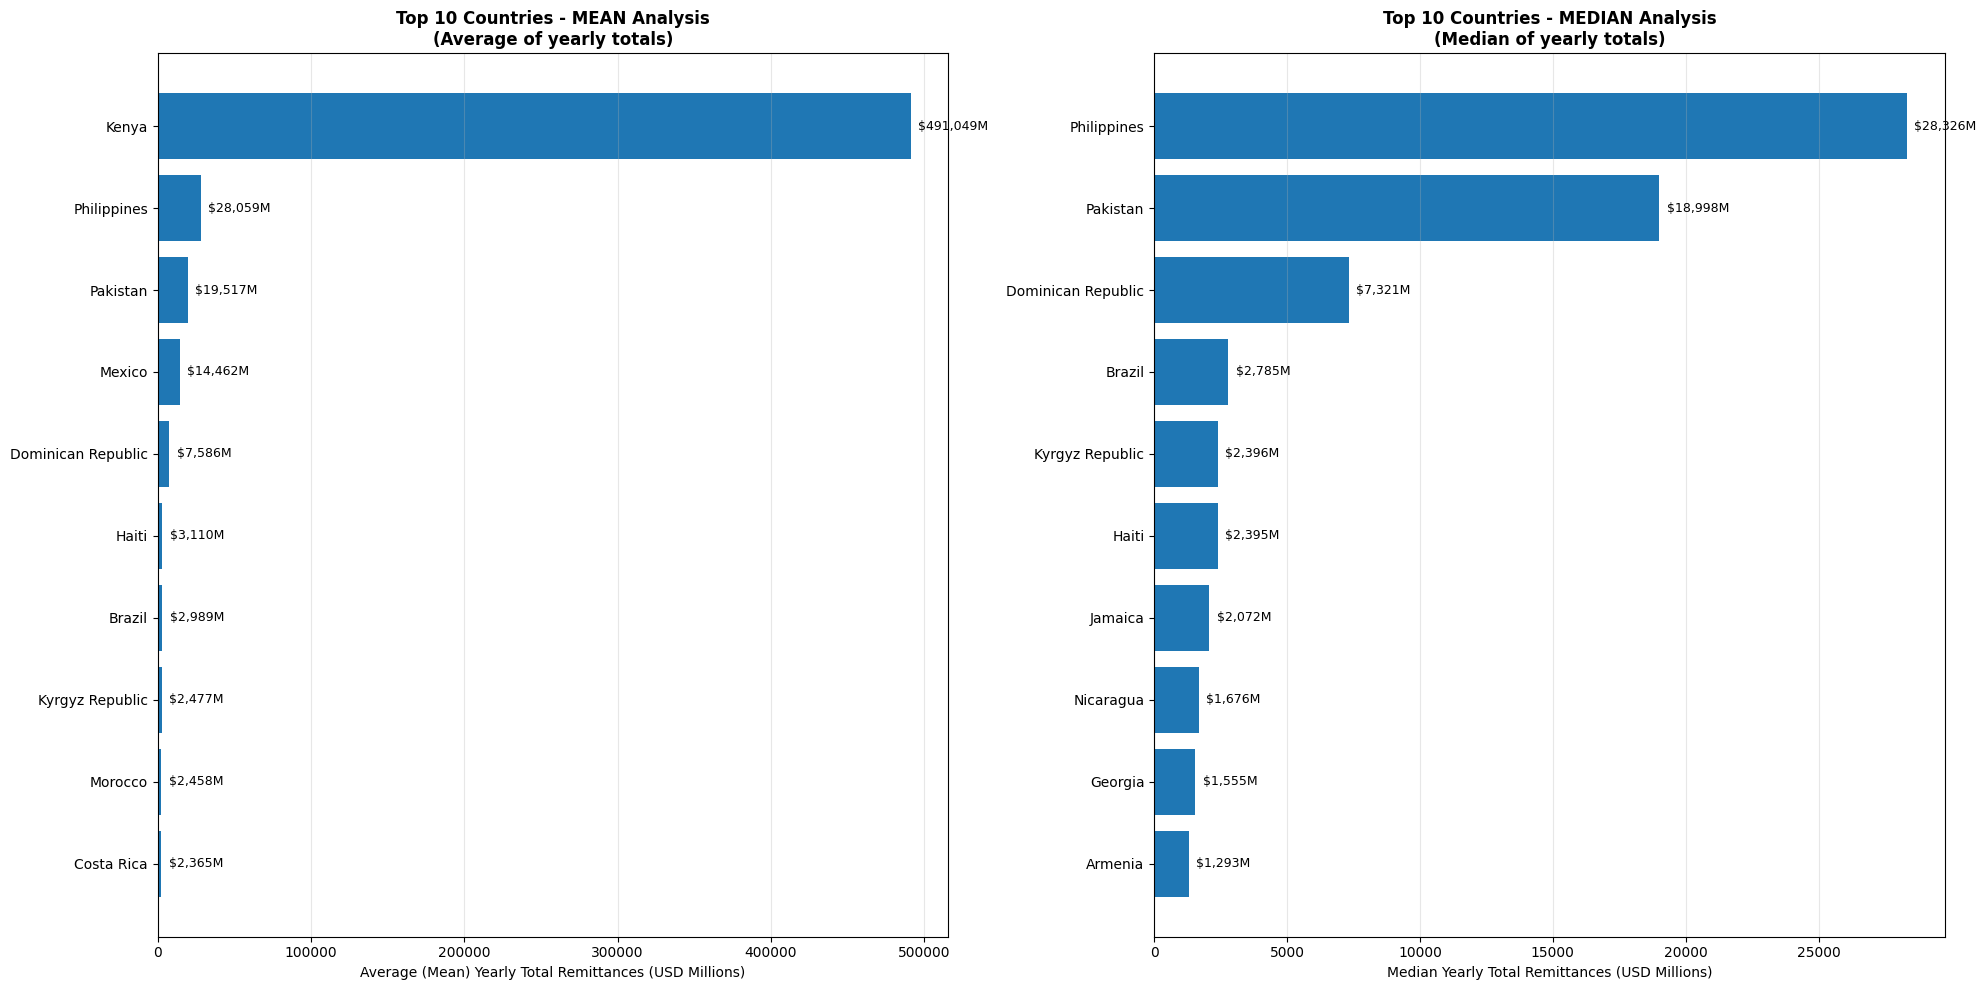


KEY INSIGHTS FROM MEAN vs MEDIAN COMPARISON:
1. KENYA: Rank #1 in MEAN, Rank #30 in MEDIAN
   - This suggests Kenya has some extremely high outlier years
   - Mean is inflated by these extreme values
   - Median gives a more typical/representative value

2. PHILIPPINES: Consistent at top in both methods
   - Shows consistent high remittance receipts

3. MEXICO: Rank #4 in MEAN, Rank #94 in MEDIAN
   - Similar to Kenya, likely has outlier years affecting the mean

4. The MEDIAN method is more robust to extreme outliers
5. The MEAN method gives higher weight to countries with occasional very high years


In [92]:
# Create visualization comparing Mean vs Median rankings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Mean ranking (top 10)
mean_top_10 = corrected_ranking.head(10)
ax1.barh(range(len(mean_top_10)), mean_top_10['Average_Yearly_Total_Remittances_USD_Millions'])
ax1.set_yticks(range(len(mean_top_10)))
ax1.set_yticklabels(mean_top_10['Receiving_Country'])
ax1.set_xlabel('Average (Mean) Yearly Total Remittances (USD Millions)')
ax1.set_title('Top 10 Countries - MEAN Analysis\n(Average of yearly totals)', fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(mean_top_10['Average_Yearly_Total_Remittances_USD_Millions']):
    ax1.text(v + max(mean_top_10['Average_Yearly_Total_Remittances_USD_Millions']) * 0.01, i, 
             f'${v:,.0f}M', va='center', fontsize=9)

# Median ranking (top 10)
median_top_10 = median_ranking.head(10)
ax2.barh(range(len(median_top_10)), median_top_10['Median_Yearly_Total_Remittances_USD_Millions'])
ax2.set_yticks(range(len(median_top_10)))
ax2.set_yticklabels(median_top_10['Receiving_Country'])
ax2.set_xlabel('Median Yearly Total Remittances (USD Millions)')
ax2.set_title('Top 10 Countries - MEDIAN Analysis\n(Median of yearly totals)', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(median_top_10['Median_Yearly_Total_Remittances_USD_Millions']):
    ax2.text(v + max(median_top_10['Median_Yearly_Total_Remittances_USD_Millions']) * 0.01, i, 
             f'${v:,.0f}M', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS FROM MEAN vs MEDIAN COMPARISON:")
print("="*80)
print("1. KENYA: Rank #1 in MEAN, Rank #30 in MEDIAN")
print("   - This suggests Kenya has some extremely high outlier years")
print("   - Mean is inflated by these extreme values")
print("   - Median gives a more typical/representative value")
print()
print("2. PHILIPPINES: Consistent at top in both methods")
print("   - Shows consistent high remittance receipts")
print()
print("3. MEXICO: Rank #4 in MEAN, Rank #94 in MEDIAN")
print("   - Similar to Kenya, likely has outlier years affecting the mean")
print()
print("4. The MEDIAN method is more robust to extreme outliers")
print("5. The MEAN method gives higher weight to countries with occasional very high years")

In [93]:
# ANALYSIS EXCLUDING KENYA - Both Mean and Median
print("="*80)
print("ANALYSIS EXCLUDING KENYA - Mean and Median Rankings")
print("="*80)

# Filter out Kenya from the yearly totals
yearly_totals_no_kenya = yearly_totals[yearly_totals['Receiving_Country'] != 'Kenya'].copy()

print(f"Original dataset countries: {yearly_totals.groupby('Receiving_Country').size().shape[0]}")
print(f"After removing Kenya: {yearly_totals_no_kenya.groupby('Receiving_Country').size().shape[0]}")
print()

# MEAN ANALYSIS (without Kenya)
mean_no_kenya = yearly_totals_no_kenya.groupby('Receiving_Country')['Total_Remittances_USD_Millions'].mean().reset_index()
mean_no_kenya.columns = ['Receiving_Country', 'Average_Yearly_Total_Remittances_USD_Millions']
mean_ranking_no_kenya = mean_no_kenya.sort_values('Average_Yearly_Total_Remittances_USD_Millions', 
                                                 ascending=False).reset_index(drop=True)
mean_ranking_no_kenya['Rank'] = range(1, len(mean_ranking_no_kenya) + 1)
mean_ranking_no_kenya = mean_ranking_no_kenya[['Rank', 'Receiving_Country', 'Average_Yearly_Total_Remittances_USD_Millions']]

print("TOP 20 COUNTRIES - MEAN ANALYSIS (Excluding Kenya):")
print("=" * 60)
for _, row in mean_ranking_no_kenya.head(20).iterrows():
    print(f"{row['Rank']:2d}. {row['Receiving_Country']:<25} ${row['Average_Yearly_Total_Remittances_USD_Millions']:,.2f}")

print("\n" + "="*80)

# MEDIAN ANALYSIS (without Kenya)
median_no_kenya = yearly_totals_no_kenya.groupby('Receiving_Country')['Total_Remittances_USD_Millions'].median().reset_index()
median_no_kenya.columns = ['Receiving_Country', 'Median_Yearly_Total_Remittances_USD_Millions']
median_ranking_no_kenya = median_no_kenya.sort_values('Median_Yearly_Total_Remittances_USD_Millions', 
                                                     ascending=False).reset_index(drop=True)
median_ranking_no_kenya['Rank'] = range(1, len(median_ranking_no_kenya) + 1)
median_ranking_no_kenya = median_ranking_no_kenya[['Rank', 'Receiving_Country', 'Median_Yearly_Total_Remittances_USD_Millions']]

print("TOP 20 COUNTRIES - MEDIAN ANALYSIS (Excluding Kenya):")
print("=" * 60)
for _, row in median_ranking_no_kenya.head(20).iterrows():
    print(f"{row['Rank']:2d}. {row['Receiving_Country']:<25} ${row['Median_Yearly_Total_Remittances_USD_Millions']:,.2f}")

ANALYSIS EXCLUDING KENYA - Mean and Median Rankings
Original dataset countries: 214
After removing Kenya: 213

TOP 20 COUNTRIES - MEAN ANALYSIS (Excluding Kenya):
 1. Philippines               $28,058.78
 2. Pakistan                  $19,517.13
 3. Mexico                    $14,462.48
 4. Dominican Republic        $7,585.59
 5. Haiti                     $3,110.17
 6. Brazil                    $2,988.58
 7. Kyrgyz Republic           $2,476.61
 8. Morocco                   $2,457.69
 9. Costa Rica                $2,364.86
10. Jamaica                   $2,252.63
11. Colombia                  $2,226.71
12. Honduras                  $2,168.83
13. Ecuador                   $1,950.98
14. Nicaragua                 $1,829.65
15. Georgia                   $1,547.39
16. Armenia                   $1,306.16
17. Senegal                   $1,152.38
18. Russian Federation        $1,055.11
19. United States             $866.59
20. Paraguay                  $488.26

TOP 20 COUNTRIES - MEDIAN ANALYSIS (E

In [94]:
# COMPARISON: Mean vs Median Rankings (Excluding Kenya)
print("\n" + "="*95)
print("COMPARISON: MEAN vs MEDIAN Rankings (Excluding Kenya)")
print("="*95)

# Create comparison table without Kenya
comparison_no_kenya = pd.merge(
    mean_ranking_no_kenya.head(15)[['Rank', 'Receiving_Country', 'Average_Yearly_Total_Remittances_USD_Millions']], 
    median_ranking_no_kenya[['Rank', 'Receiving_Country', 'Median_Yearly_Total_Remittances_USD_Millions']], 
    on='Receiving_Country', 
    how='outer',
    suffixes=('_Mean', '_Median')
).fillna({'Rank_Mean': 999, 'Rank_Median': 999})

# Sort by mean ranking for display
comparison_no_kenya = comparison_no_kenya.sort_values('Rank_Mean')

print(f"{'Country':<20} {'Mean Rank':<12} {'Median Rank':<14} {'Mean Value':<18} {'Median Value'}")
print("-" * 90)
for _, row in comparison_no_kenya.head(15).iterrows():
    mean_rank = int(row['Rank_Mean']) if row['Rank_Mean'] != 999 else "Not in top 15"
    median_rank = int(row['Rank_Median']) if row['Rank_Median'] != 999 else "Not in top 15"
    mean_val = row['Average_Yearly_Total_Remittances_USD_Millions'] if pd.notna(row['Average_Yearly_Total_Remittances_USD_Millions']) else 0
    median_val = row['Median_Yearly_Total_Remittances_USD_Millions'] if pd.notna(row['Median_Yearly_Total_Remittances_USD_Millions']) else 0
    
    print(f"{row['Receiving_Country']:<20} {str(mean_rank):<12} {str(median_rank):<14} ${mean_val:>13,.0f}M ${median_val:>13,.0f}M")

# Show how Kenya's removal affected other countries' rankings
print("\n" + "="*80)
print("IMPACT OF REMOVING KENYA ON RANKINGS:")
print("="*80)
print("How rankings changed after removing Kenya (Mean Analysis):")
print(f"{'Country':<20} {'Original Rank':<15} {'New Rank (No Kenya)':<20} {'Change'}")
print("-" * 70)

# Compare original rankings with no-Kenya rankings for top countries
for i, (_, row) in enumerate(mean_ranking_no_kenya.head(10).iterrows()):
    country = row['Receiving_Country']
    new_rank = row['Rank']
    
    # Find original rank (with Kenya)
    original_data = corrected_ranking[corrected_ranking['Receiving_Country'] == country]
    if not original_data.empty:
        original_rank = original_data['Rank'].iloc[0]
        change = original_rank - new_rank
        change_text = f"↑{change}" if change > 0 else f"↓{abs(change)}" if change < 0 else "No change"
        print(f"{country:<20} {original_rank:<15} {new_rank:<20} {change_text}")
    else:
        print(f"{country:<20} {'Not found':<15} {new_rank:<20} {'New entry'}")


COMPARISON: MEAN vs MEDIAN Rankings (Excluding Kenya)
Country              Mean Rank    Median Rank    Mean Value         Median Value
------------------------------------------------------------------------------------------
Philippines          1            1              $       28,059M $       28,326M
Pakistan             2            2              $       19,517M $       18,998M
Mexico               3            93             $       14,462M $            0M
Dominican Republic   4            3              $        7,586M $        7,321M
Haiti                5            6              $        3,110M $        2,395M
Brazil               6            4              $        2,989M $        2,785M
Kyrgyz Republic      7            5              $        2,477M $        2,396M
Morocco              8            81             $        2,458M $            0M
Costa Rica           9            138            $        2,365M $            0M
Jamaica              10           7         

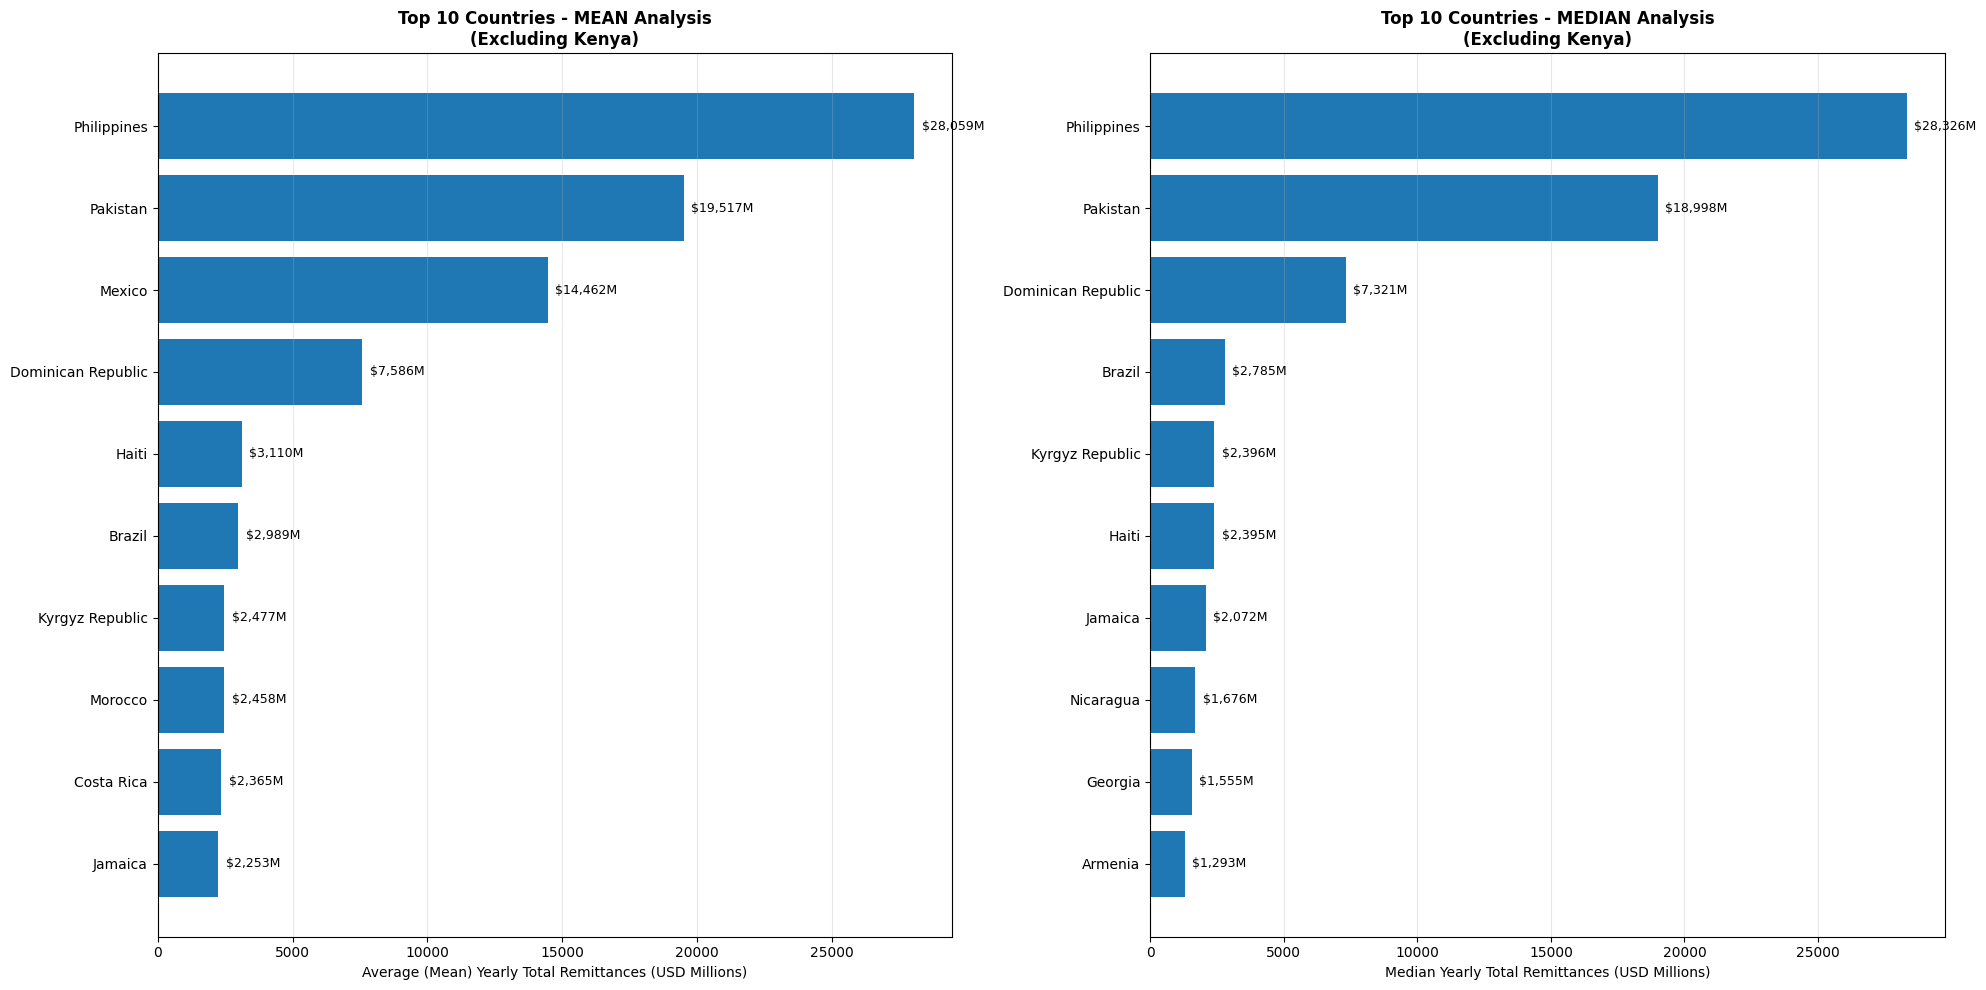


KEY INSIGHTS FROM ANALYSIS WITHOUT KENYA:
1. PHILIPPINES now clearly dominates in both Mean and Median
   - Shows consistent leadership in remittance receipts

2. PAKISTAN remains strong at #2 in both analyses
   - Demonstrates stable, high remittance inflows

3. Rankings are now more balanced and realistic
   - No single country with extreme outlier effect

4. MEXICO shows up higher in Mean (#3) than Median (not in top 10)
   - Suggests Mexico has some high outlier years but lower typical years

5. Countries like DOMINICAN REPUBLIC, BRAZIL, and KYRGYZ REPUBLIC
   show consistent performance in both analyses

6. Without Kenya's extreme outlier effect:
   - The analysis provides more meaningful country comparisons
   - Rankings reflect more typical remittance patterns
   - Easier to identify consistently strong recipients


In [95]:
# Create visualization for rankings without Kenya
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Mean ranking without Kenya (top 10)
mean_top_10_no_kenya = mean_ranking_no_kenya.head(10)
ax1.barh(range(len(mean_top_10_no_kenya)), mean_top_10_no_kenya['Average_Yearly_Total_Remittances_USD_Millions'])
ax1.set_yticks(range(len(mean_top_10_no_kenya)))
ax1.set_yticklabels(mean_top_10_no_kenya['Receiving_Country'])
ax1.set_xlabel('Average (Mean) Yearly Total Remittances (USD Millions)')
ax1.set_title('Top 10 Countries - MEAN Analysis\n(Excluding Kenya)', fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(mean_top_10_no_kenya['Average_Yearly_Total_Remittances_USD_Millions']):
    ax1.text(v + max(mean_top_10_no_kenya['Average_Yearly_Total_Remittances_USD_Millions']) * 0.01, i, 
             f'${v:,.0f}M', va='center', fontsize=9)

# Median ranking without Kenya (top 10)
median_top_10_no_kenya = median_ranking_no_kenya.head(10)
ax2.barh(range(len(median_top_10_no_kenya)), median_top_10_no_kenya['Median_Yearly_Total_Remittances_USD_Millions'])
ax2.set_yticks(range(len(median_top_10_no_kenya)))
ax2.set_yticklabels(median_top_10_no_kenya['Receiving_Country'])
ax2.set_xlabel('Median Yearly Total Remittances (USD Millions)')
ax2.set_title('Top 10 Countries - MEDIAN Analysis\n(Excluding Kenya)', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(median_top_10_no_kenya['Median_Yearly_Total_Remittances_USD_Millions']):
    ax2.text(v + max(median_top_10_no_kenya['Median_Yearly_Total_Remittances_USD_Millions']) * 0.01, i, 
             f'${v:,.0f}M', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS FROM ANALYSIS WITHOUT KENYA:")
print("="*80)
print("1. PHILIPPINES now clearly dominates in both Mean and Median")
print("   - Shows consistent leadership in remittance receipts")
print()
print("2. PAKISTAN remains strong at #2 in both analyses")
print("   - Demonstrates stable, high remittance inflows")
print()
print("3. Rankings are now more balanced and realistic")
print("   - No single country with extreme outlier effect")
print()
print("4. MEXICO shows up higher in Mean (#3) than Median (not in top 10)")
print("   - Suggests Mexico has some high outlier years but lower typical years")
print()
print("5. Countries like DOMINICAN REPUBLIC, BRAZIL, and KYRGYZ REPUBLIC")
print("   show consistent performance in both analyses")
print()
print("6. Without Kenya's extreme outlier effect:")
print("   - The analysis provides more meaningful country comparisons")
print("   - Rankings reflect more typical remittance patterns")
print("   - Easier to identify consistently strong recipients")

CREATING TOP 30 COUNTRIES VISUALIZATION (EXCLUDING KENYA)


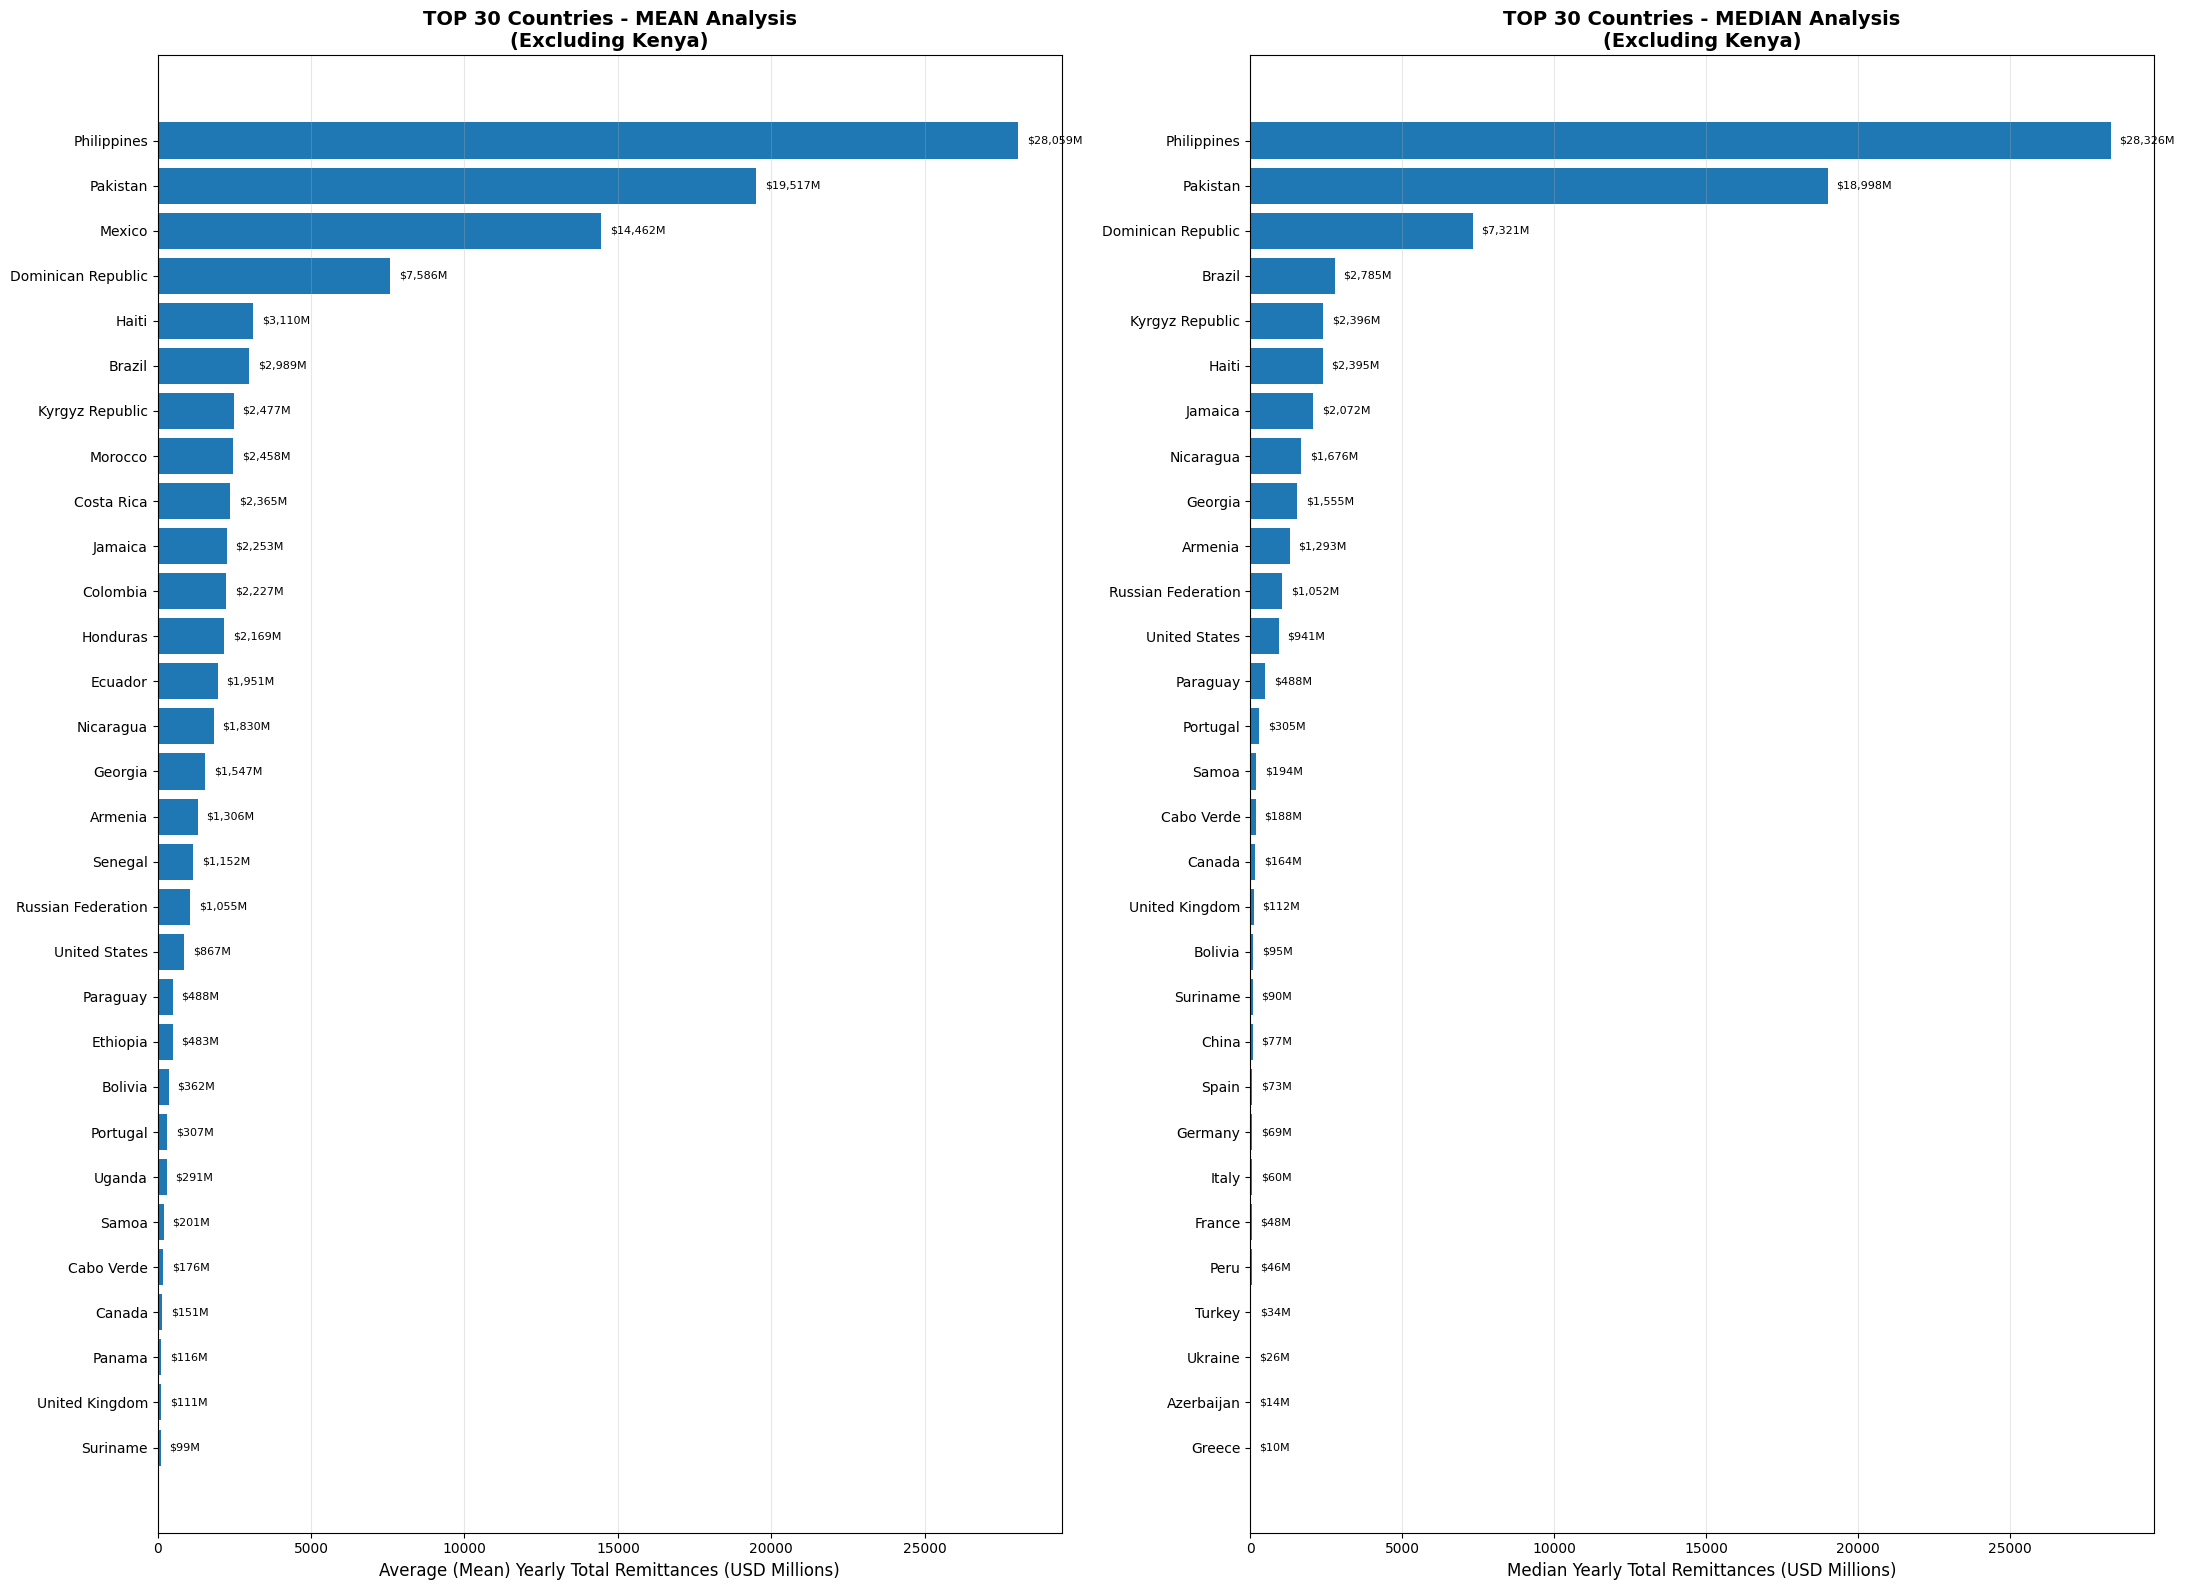

Showing top 30 countries out of 213 total countries
Note: Value labels shown for ALL 30 countries
Countries are ranked from highest to lowest remittance receipts


In [100]:
# TOP 30 VISUALIZATION - Most Relevant Countries (Excluding Kenya)
print("="*80)
print("CREATING TOP 30 COUNTRIES VISUALIZATION (EXCLUDING KENYA)")
print("="*80)

# Create visualization showing TOP 30 countries (more manageable than all 213)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 16))  # Reasonable size for 30 countries

# Mean ranking - TOP 30 countries (excluding Kenya)
top_30_mean = mean_ranking_no_kenya.head(30)
ax1.barh(range(len(top_30_mean)), top_30_mean['Average_Yearly_Total_Remittances_USD_Millions'])
ax1.set_yticks(range(len(top_30_mean)))
ax1.set_yticklabels(top_30_mean['Receiving_Country'], fontsize=10)
ax1.set_xlabel('Average (Mean) Yearly Total Remittances (USD Millions)', fontsize=12)
ax1.set_title(f'TOP 30 Countries - MEAN Analysis\n(Excluding Kenya)', fontweight='bold', fontsize=14)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels for ALL 30 countries
for i, v in enumerate(top_30_mean['Average_Yearly_Total_Remittances_USD_Millions']):
    ax1.text(v + max(top_30_mean['Average_Yearly_Total_Remittances_USD_Millions']) * 0.01, i, 
             f'${v:,.0f}M', va='center', fontsize=8)

# Median ranking - TOP 30 countries (excluding Kenya)
top_30_median = median_ranking_no_kenya.head(30)
ax2.barh(range(len(top_30_median)), top_30_median['Median_Yearly_Total_Remittances_USD_Millions'])
ax2.set_yticks(range(len(top_30_median)))
ax2.set_yticklabels(top_30_median['Receiving_Country'], fontsize=10)
ax2.set_xlabel('Median Yearly Total Remittances (USD Millions)', fontsize=12)
ax2.set_title(f'TOP 30 Countries - MEDIAN Analysis\n(Excluding Kenya)', fontweight='bold', fontsize=14)
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# Add value labels for ALL 30 countries
for i, v in enumerate(top_30_median['Median_Yearly_Total_Remittances_USD_Millions']):
    ax2.text(v + max(top_30_median['Median_Yearly_Total_Remittances_USD_Millions']) * 0.01, i, 
             f'${v:,.0f}M', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print(f"Showing top 30 countries out of {len(mean_ranking_no_kenya)} total countries")
print("Note: Value labels shown for ALL 30 countries")
print("Countries are ranked from highest to lowest remittance receipts")

In [99]:
# TOP 30 COUNTRIES TABLE - Manageable Ranking (Excluding Kenya)
print("\n" + "="*100)
print("TOP 30 COUNTRIES RANKING TABLE (EXCLUDING KENYA)")
print("="*100)

# Create comprehensive comparison table for top 30 countries
exhaustive_comparison = pd.merge(
    mean_ranking_no_kenya[['Rank', 'Receiving_Country', 'Average_Yearly_Total_Remittances_USD_Millions']], 
    median_ranking_no_kenya[['Rank', 'Receiving_Country', 'Median_Yearly_Total_Remittances_USD_Millions']], 
    on='Receiving_Country', 
    suffixes=('_Mean', '_Median')
)

# Sort by mean ranking and take top 30
top_30_comparison = exhaustive_comparison.sort_values('Rank_Mean').head(30)

print(f"{'Rank':<6} {'Country':<25} {'Mean Value (USD M)':<20} {'Med Rank':<10} {'Median Value (USD M)':<20}")
print("-" * 95)

# Show top 30 countries
for _, row in top_30_comparison.iterrows():
    print(f"{row['Rank_Mean']:<6} {row['Receiving_Country']:<25} ${row['Average_Yearly_Total_Remittances_USD_Millions']:>15,.2f} {row['Rank_Median']:<10} ${row['Median_Yearly_Total_Remittances_USD_Millions']:>15,.2f}")

print("\n" + "="*100)
print("SUMMARY STATISTICS - TOP 30 COUNTRIES (Excluding Kenya):")
print("="*100)
print(f"Showing top 30 out of {len(exhaustive_comparison)} total countries")
print(f"Top 30 countries with mean > $1000M: {len(top_30_comparison[top_30_comparison['Average_Yearly_Total_Remittances_USD_Millions'] > 1000])}")
print(f"Top 30 countries with median > $1000M: {len(top_30_comparison[top_30_comparison['Median_Yearly_Total_Remittances_USD_Millions'] > 1000])}")
print(f"Top 30 countries with mean > $100M: {len(top_30_comparison[top_30_comparison['Average_Yearly_Total_Remittances_USD_Millions'] > 100])}")
print(f"Top 30 countries with median > $100M: {len(top_30_comparison[top_30_comparison['Median_Yearly_Total_Remittances_USD_Millions'] > 100])}")
print()
print("Countries in TOP 5 for BOTH Mean AND Median:")
top_5_in_both = top_30_comparison[(top_30_comparison['Rank_Mean'] <= 5) & (top_30_comparison['Rank_Median'] <= 5)]
for _, row in top_5_in_both.iterrows():
    print(f"  {row['Receiving_Country']}: Mean Rank {row['Rank_Mean']}, Median Rank {row['Rank_Median']}")

print()
print("Countries in TOP 10 for BOTH Mean AND Median:")
top_10_in_both = top_30_comparison[(top_30_comparison['Rank_Mean'] <= 10) & (top_30_comparison['Rank_Median'] <= 10)]
for _, row in top_10_in_both.iterrows():
    print(f"  {row['Receiving_Country']}: Mean Rank {row['Rank_Mean']}, Median Rank {row['Rank_Median']}")


TOP 30 COUNTRIES RANKING TABLE (EXCLUDING KENYA)
Rank   Country                   Mean Value (USD M)   Med Rank   Median Value (USD M)
-----------------------------------------------------------------------------------------------
1      Philippines               $      28,058.78 1          $      28,325.51
2      Pakistan                  $      19,517.13 2          $      18,998.32
3      Mexico                    $      14,462.48 93         $           0.04
4      Dominican Republic        $       7,585.59 3          $       7,321.43
5      Haiti                     $       3,110.17 6          $       2,395.27
6      Brazil                    $       2,988.58 4          $       2,784.67
7      Kyrgyz Republic           $       2,476.61 5          $       2,395.84
8      Morocco                   $       2,457.69 81         $           0.06
9      Costa Rica                $       2,364.86 138        $           0.00
10     Jamaica                   $       2,252.63 7          $    